# Анализ оттока посетителей спортивного клуба

Фитнес-центр проводит анализ посетителей и столкнулся с проблемой — отток клиентов. Считаем, что клиент попал в отток, если за последний месяц ни разу не посетил зал.
   
Задача — провести анализ и понять, как удержать клиентов клуба.

Переменные в датасете:

Данные содержат информацию о факте оттока в текущем месяце, пол, возрасте, времени с момента первого обращения в фитнес-центр (в месяцах), длительности текущего действующего абонемента,  сроке до окончания текущего действующего абонемента и т.д. 

## Загрузка данных

In [1]:
pip install seaborn --upgrade

Requirement already up-to-date: seaborn in ./opt/anaconda3/lib/python3.8/site-packages (0.11.1)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import pylab as pl
import numpy as np
from IPython.display import display
import plotly.express as px 
import datetime as dt
import scipy.stats
import scipy.stats as stats
from scipy import stats as st
import plotly.express as px
import math as mth
import cmath as cmth
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from plotly import graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [4]:
gym = pd.read_csv('gym_churn.csv')

In [5]:
gym

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [6]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [7]:
gym= gym.rename(columns=str.lower)


In [8]:
gym['month_to_end_contract']=gym['month_to_end_contract'].astype('int64')

In [9]:
gym.duplicated().value_counts()

False    4000
dtype: int64

### Вывод

В датасете пропущенные данные отсутствуют. Были заменены названия переменных на нижний регистр, а также изменен тип данных для переменной *month_to_end_contract*. Дубликаты в данных также отсутствуют.

## Исследовательский анализ данных (EDA)

* **Рассмотрение средних значений и стандартных отклонений**

In [10]:
gym.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Большинство переменных - дамми, принимают значения 0 или 1. В среднем длительность текущего абонемента среди клиентов - 4,7 месяца (стандартное отклонение 4,55). Средний возраст 29 лет со стандартным отклонением 3,26. Максимальный возраст среди клиентов - 41 год. 
Средний срок до окончания контракта - 4,32, а среднее время с момента первого обращения в фитнес-клуб - 3,72. Суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон в среднем равна 147. Средняя частота посещений в неделю за все время с начала действия абонемента - 1,87 (ст. отклонение 0.97). Средняя частота посещений в неделю за предыдущий месяц - 1,76 (ст.отклонение 1.05).

Среди наблюдений переменная пола распределена равномерно (51% и 49%). 84% клиентов проживают или работают в районе, где расположен фитнес-центр. 47% клиентов являются сотрудниками компаний-партнеров клуба. Всего 41% посетителей посещают групповые занятия. 

* **Средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался**


In [11]:
gym.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Разницы в оттоке между мужчинами и женщинами нет. Среди тех, кто попал в отток средняя длительность действия договора меньше, чем у текущих посетителей и равна - 1.72 месяца (против 5.7 у действующих клиентов). Это может быть связано с тем, что клиенты, которые сомневаются, смогут ли они регулярно посещать фитнес-центр, выбирают договор на более короткий срок, чтобы не потерять деньги. Также для них характерен меньший срок до окончания действия договора - 1,66 месяца (влияние заключения договора изначально на недолгий период). Среднее время с первого обращения в фитнес-клуб - 1 месяц. Соответственно, те, кто попал в отток имеют меньшую среднюю суммарную выручку по дополнительным услугам (115 против 158,4). В среднем посещение в неделю за все время с начала действия абонемента для оттока - 1,47, за прошедший месяц - 1 раз (против 2,024 и 2,027 у текущих посетителей клуба).

* **Распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)**

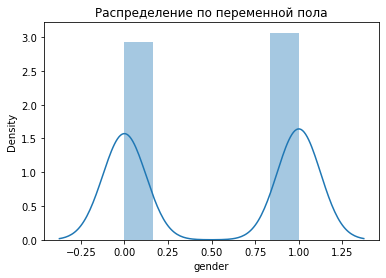

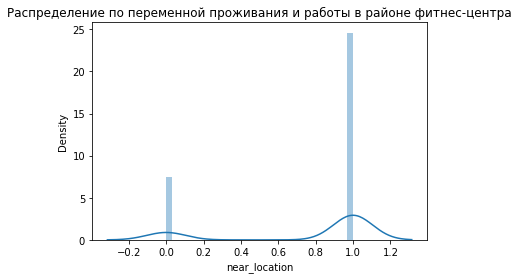

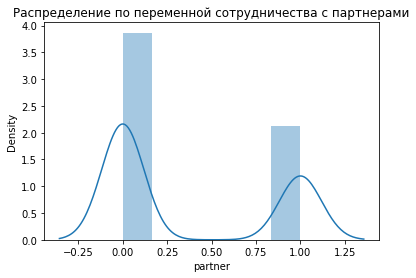

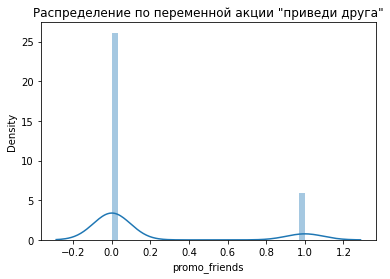

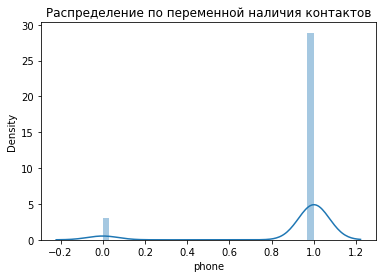

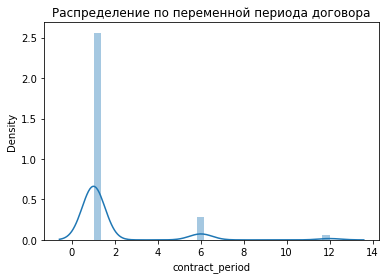

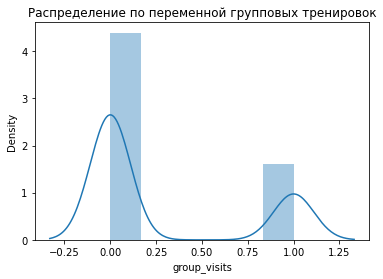

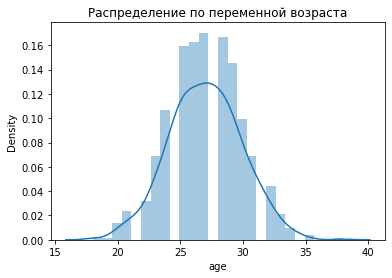

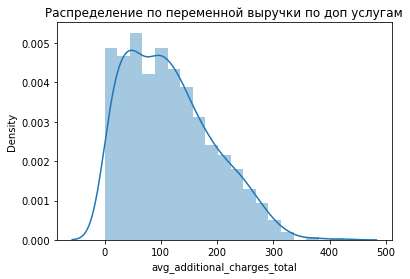

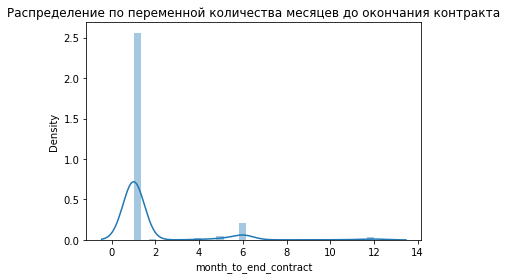

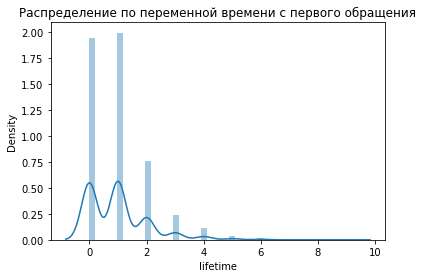

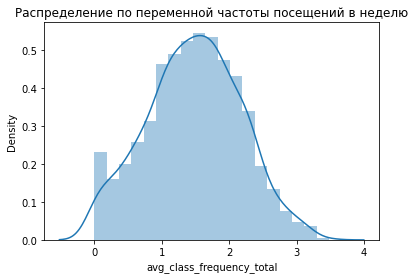

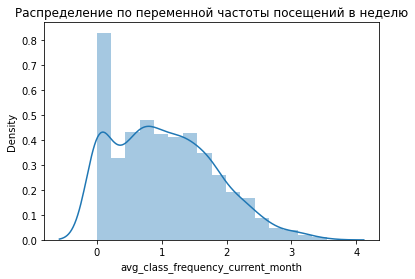

In [12]:
title = ([('Распределение по переменной пола'),('Распределение по переменной проживания и работы в районе фитнес-центра'),('Распределение по переменной сотрудничества с партнерами'),('Распределение по переменной акции "приведи друга"'),('Распределение по переменной наличия контактов'),('Распределение по переменной периода договора'),('Распределение по переменной групповых тренировок'),('Распределение по переменной возраста'),('Распределение по переменной выручки по доп услугам'),('Распределение по переменной количества месяцев до окончания контракта'),('Распределение по переменной времени с первого обращения'),('Распределение по переменной частоты посещений в неделю'),('Распределение по переменной частоты посещений в неделю')])
for column,title in zip(gym[gym['churn']==1].drop('churn',axis=1).columns, title):
    plt.figure()
    sns.distplot(gym[gym['churn']==1].drop('churn',axis=1)[column])
    plt.title(title)

* **Матрица корреляций**

In [13]:
cm = gym.corr()

<AxesSubplot:>

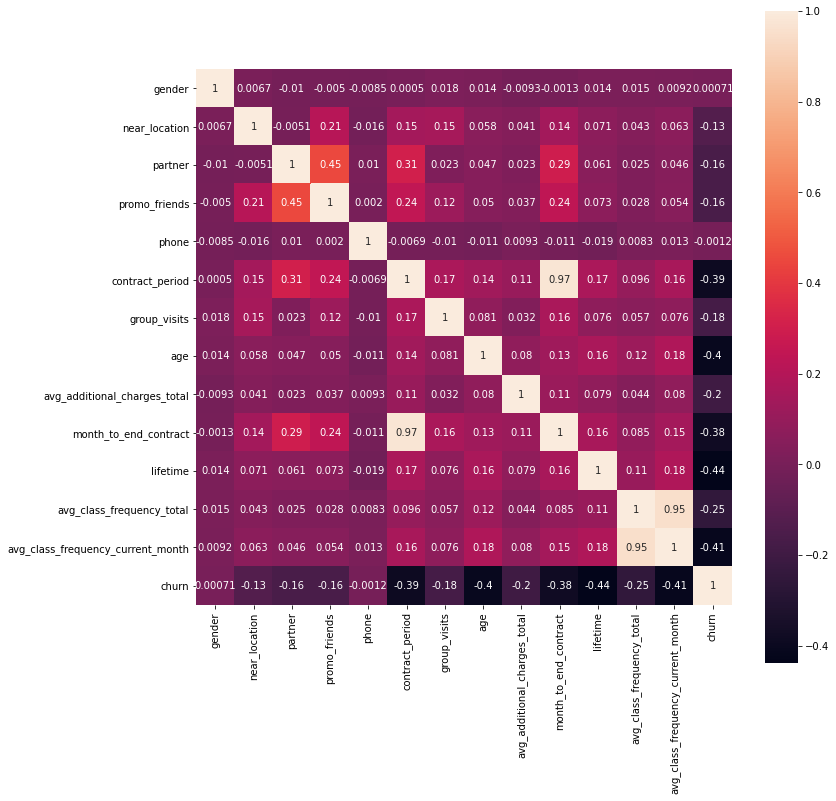

In [14]:
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot = True, square=True)

По матрице корреляций можно увидеть, что есть переменные, которые сильно коррелируют друг с другом (более 0,9)(*avg_class_frequency_total* и *avg_class_frequency_current_month*, *contract_period* и *month_to_end_contract*). Чтобы избежать мультиколлинеарности, удалим две переменные - *avg_class_frequency_current_month* и *month_to_end_contract*.

In [15]:
gym=gym.drop(['avg_class_frequency_current_month','month_to_end_contract'],axis=1)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Всё верно у нас есть мультиколлениарность и здорово, что мы избавились от этих переменных.
    
Кстати можно было бы удалить только одну.

    
</div>

Зададим целевую переменную и признаки.

In [16]:
X=gym.drop('churn',axis=1)


In [17]:
y=gym['churn']

### Вывод

При разделении на группу оттока и действующих клиентов, существуют различия среди переменных по продолжительности контракта, количестве месяцев до окончания действия абонемента, среднем количестве посещений в неделю, а также о выручке с дополнительных услуг. Предварительно можно сделать вывод, что клиенты, которые склонны к оттоку, покупают абонементы на более короткий срок. 
   
Была построена матрица корреляций. Среди переменных avg_class_frequency_total и avg_class_frequency_current_month, contract_period и month_to_end_contract выявлена сильная корреляция (более 0,9), поэтому часть переменных была удалена для избежания мультиколлинеарности. 

Были заданы признаки и целевая переменная.


## Построение модели прогнозирования оттока клиентов

Разделяем модель на обучающую и валидационную выборку

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

* **Логистическая регрессия**

Зададим алгоритм для модели и обучим ее

In [19]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

Сделаем прогнозы

In [20]:
predictions = model.predict(X_test) 
probabilities = model.predict_proba(X_test)[:,1]


Выведем все изученные метрики для полученного прогноза

In [21]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [22]:
print_all_metrics(y_test, predictions, probabilities, title = 'Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.88
	Precision: 0.76
	Recall: 0.77


* **Модель случайного леса**

Зададим алгоритм для новой модели на основе алгоритма случайного леса с числом деревьев 100, обучим ее и сделаем прогнозы.

In [23]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test) 
rf_probabilities = rf_model.predict_proba(X_test)[:,1]

Выведем метрики

In [24]:
print_all_metrics(y_test,rf_predictions,rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.89
	Precision: 0.78
	Recall: 0.77


Попробуем подобрать оптимальное количество деревьев для достижения лучших показателей метрик (подбираем по accuracy)

In [25]:
best_model = None 
best_result = 0
best_est = 0 

for est in range(1, 100): 
    model = RandomForestClassifier(random_state=0, n_estimators=est) 
    model.fit(X_train, y_train) 
    result = model.score(X_test, y_test) 
    if result > best_result: 
        best_model = model 
        best_result = result 
        best_estimator=est 

print("Accuracy наилучшей модели на валидационной выборке: {:.2f}".format(best_result), 
"\nКол-во деревьев с лучшим accuracy:", best_estimator)

Accuracy наилучшей модели на валидационной выборке: 0.90 
Кол-во деревьев с лучшим accuracy: 71


In [26]:
rf_model = RandomForestClassifier(n_estimators = 71, random_state = 0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test) 
rf_probabilities = rf_model.predict_proba(X_test)[:,1]

In [27]:
print_all_metrics(y_test,rf_predictions,rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.90
	Precision: 0.81
	Recall: 0.79


Метрики действительно улучшились при показателе n_estimators = 71 

### Вывод

На основании метрик моделей логистической регрессии и случайного леса можно сделать вывод, что модель случайного леса с n_estimators=71 показывает наилучшие показатели.

## Кластеризация клиентов

Стандартизируем данные и построим матрицу расстояний

In [28]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
linked = linkage(X_sc, method = 'ward') 

Нарисуем дендрограмму

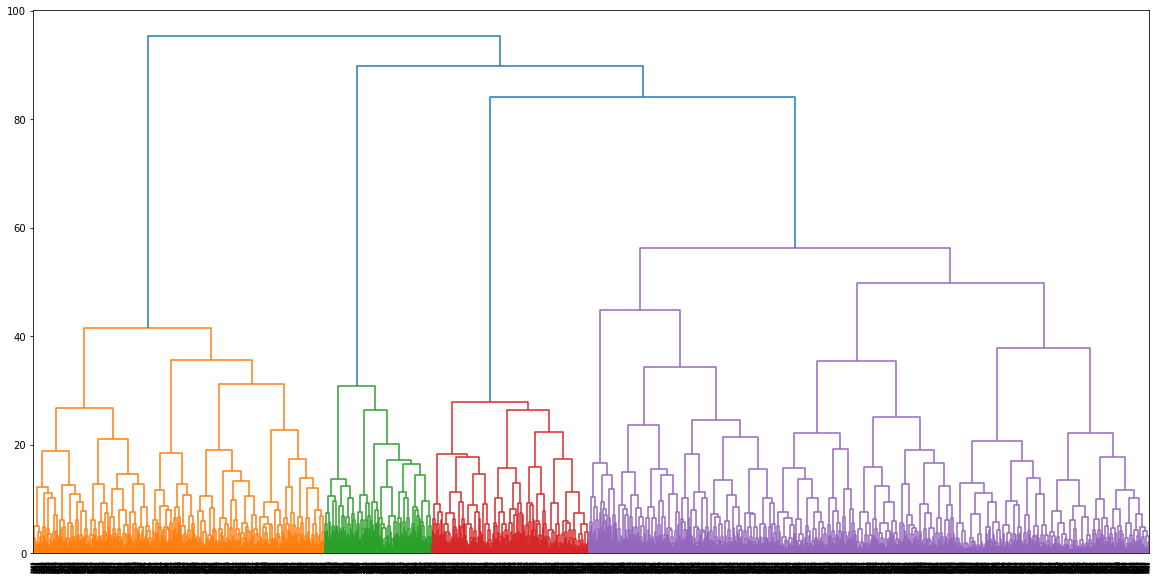

In [29]:
plt.figure(figsize=(20, 10))  
dendrogram(linked, orientation='top')
plt.show()

На основании дендрограммы можем выделить 5 кластеров. 

In [30]:
km = KMeans(n_clusters = 5,random_state=0)

In [31]:
labels = km.fit_predict(X_sc)

In [32]:
gym['cluster_km'] = labels

Посмотрим на средние значения признаков для кластеров

In [33]:
display(gym.groupby(['cluster_km']).mean())

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,churn
cluster_km,,,,,,,,,,,,
0,0.502683,0.000000,0.490161,0.078712,1.0,3.000000,0.232558,28.708408,137.385192,3.007156,1.768159,0.400716
1,0.486867,0.996248,0.943715,0.883677,1.0,7.660413,0.523452,29.474672,149.409166,4.057223,1.912481,0.117261
2,0.561614,0.996728,0.267176,0.050164,1.0,5.241003,0.533261,30.958561,186.697490,5.778626,2.400164,0.023991
3,0.488806,1.000000,0.223881,0.078358,1.0,2.082090,0.286381,27.584888,116.455656,1.933769,1.466695,0.547575
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211,0.266839


Среди кластеров средние значения различаются по переменным partner, promo_friends, contract_period, lifetime.

Построим распределения признаков для кластеров.

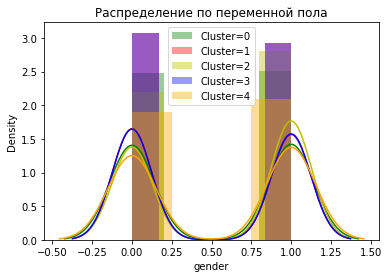

/Users/elizavetasergeeva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/elizavetasergeeva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


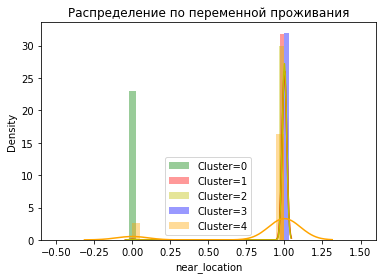

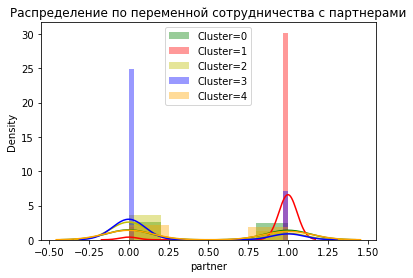

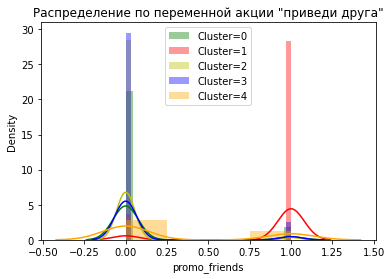

/Users/elizavetasergeeva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/elizavetasergeeva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/elizavetasergeeva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/elizavetasergeeva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/elizavetasergeeva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


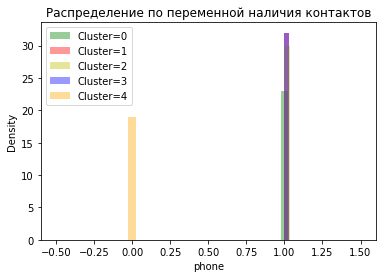

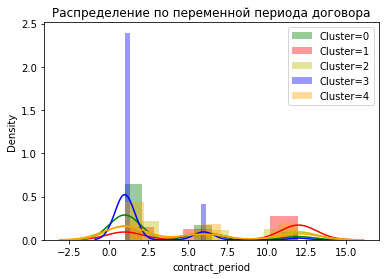

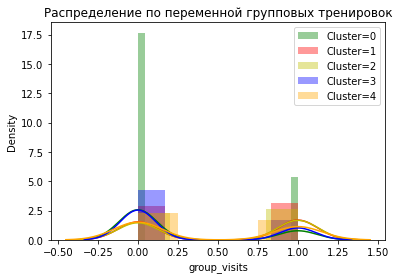

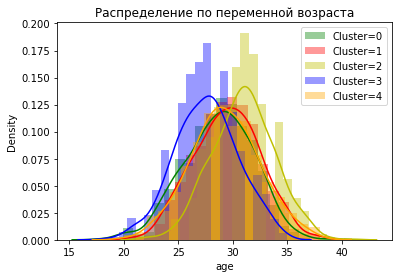

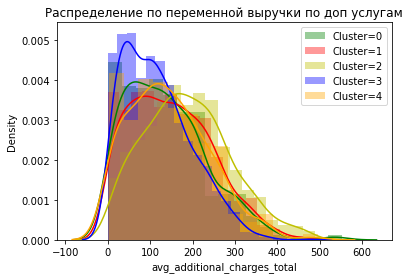

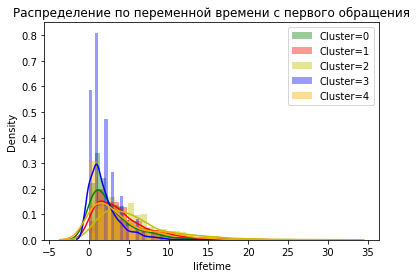

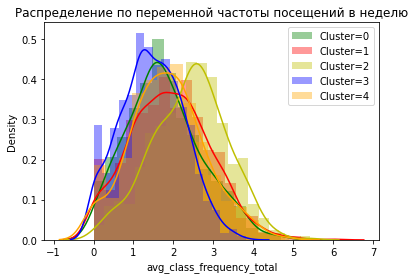

In [34]:
title = ([('Распределение по переменной пола'),('Распределение по переменной проживания'),('Распределение по переменной сотрудничества с партнерами'),('Распределение по переменной акции "приведи друга"'),('Распределение по переменной наличия контактов'),('Распределение по переменной периода договора'),('Распределение по переменной групповых тренировок'),('Распределение по переменной возраста'),('Распределение по переменной выручки по доп услугам'),('Распределение по переменной времени с первого обращения'),('Распределение по переменной частоты посещений в неделю')])
for column,title in zip(gym.drop('cluster_km',axis=1).columns, title):
    plt.figure()
    sns.distplot(gym[gym['cluster_km'] == 0][column],color="g", label="Cluster=0")
    sns.distplot(gym[gym['cluster_km'] == 1][column],color="r", label="Cluster=1")
    sns.distplot(gym[gym['cluster_km'] == 2][column],color="y", label="Cluster=2")
    sns.distplot(gym[gym['cluster_km'] == 3][column],color="b", label="Cluster=3")
    sns.distplot(gym[gym['cluster_km'] == 4][column],color="orange", label="Cluster=4")
    plt.title(title)
    plt.legend()
    plt.show()

In [35]:
gym_category=gym[['gender','near_location','partner','promo_friends','phone','group_visits','cluster_km']]

In [36]:
gym_cont=gym[['age','lifetime','contract_period','avg_class_frequency_total','avg_additional_charges_total','cluster_km']]

In [37]:
title = ([('Boxplot по переменной возраста'),('Boxplot по переменной времени с первого обращения'),('Boxplot по переменной периода договора'),('Boxplot по переменной частоты посещений в неделю'),('Boxplot по переменной выручки из доп услуг')])

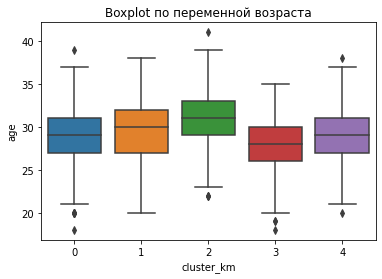

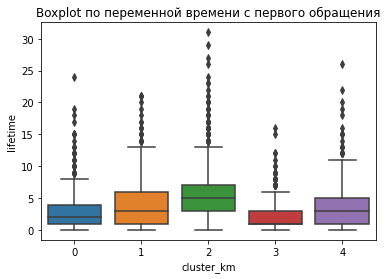

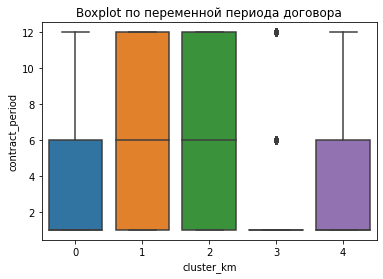

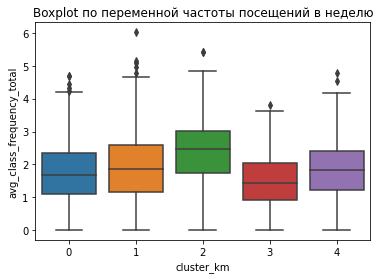

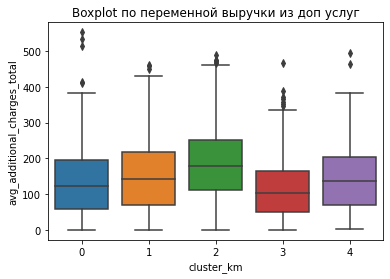

In [38]:
for column,title in zip(gym_cont.drop('cluster_km',axis=1).columns, title):
    plt.figure()
    sns.boxplot(data=gym,x = 'cluster_km',y = column)
    plt.title(title)
    plt.show()

In [39]:
title = ([('Гистограмма по переменной пола'),('Гистограмма по переменной проживания'),('Гистограмма по переменной сотрудничества с партнерами'),('Гистограмма по переменной акции "приведи друга"'),('Гистограмма по переменной наличия контактов'),('Гистограмма по переменной групповых тренировок')])

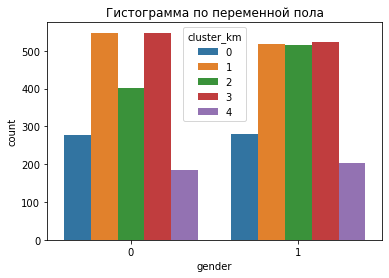

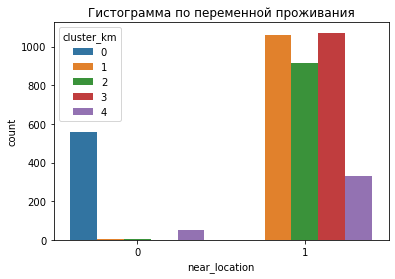

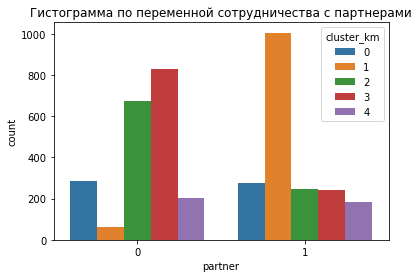

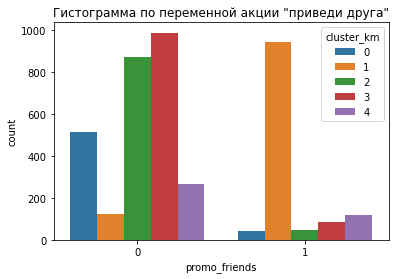

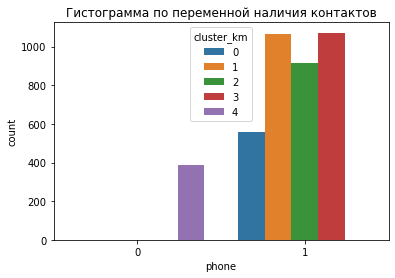

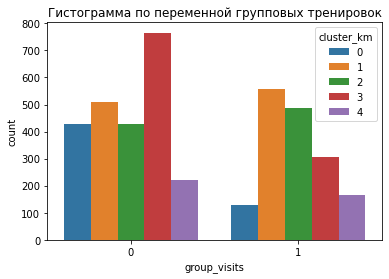

In [40]:
for column, title in zip(gym_category.drop('cluster_km',axis=1).columns,title):
    plt.figure()
    sns.countplot(x=column, hue="cluster_km", data=gym)
    plt.title(title)
    plt.show()

По переменной lifetime распределение отличается для кластеров 1,3,4 (наименее склонны к оттоку). Среднее время с момента первого обращения для первого (1) кластера составляет 4,38 месяца. Для первого кластера также отличается длительность абонемента (в среднем 7,7 месяцев). Клиенты из всех кластеров кроме нулевого (самый высокий показатель оттока) преимущественно живут или работают в районе, где находится фитнес-центр. Клиенты из кластера 0 и 2 преимущественно не посещают групповые тренировки. Также большинство клиентов из кластеров 1 и 3 пользовались акцией "приведи друга".

**Для каждого полученного кластера посчитаем долю оттока**


In [41]:
display(gym.groupby(['cluster_km'])['churn'].mean())

cluster_km
0    0.400716
1    0.117261
2    0.023991
3    0.547575
4    0.266839
Name: churn, dtype: float64

К оттоку меньше всего склонен кластер 1 (доля составляет 0,12). Больше всего склонны к оттоку кластеры 0 и 2 (доли 0,4 и 0,38 соответственно).

### Вывод

По данным было выделено 5 кластеров. Среди кластеров наблюдались расхождения в распределении нескольких переменных (partner, promo_friends, contract_period, lifetime). Можно сказать, что для кластера, который наименее склонен к оттоку характерно наличие абонемента на долгий срок, в среднем 7-8 месяцев. Также стоит уделять внимание среднему количеству посещений клиентов. Клиенты из кластеров, которые наименее склонны к оттоку (доли 0,12 и 0,2) в целом посещают фитнес-центр за неделю большее количество раз. Наличие промокода по акции "приведи друга" также положительно влияют на удержание клиента.

## Выводы и базовые рекомендации по работе с клиентами

При построении моделей пронозирования оттока клиентов были рассмотрены логистическая регрессия и модель случайного леса. Исходя из метрик наилучшей моделью является модель случайного леса с количеством деревьев - 71.

При кластеризации было проведено разделение на 5 кластеров. Среди кластеров наблюдается различие в распределении нескольких переменных. Наиболее важными факторами при рассмотрении оттока являются длительность абонемента, среднее количество занятий в неделю, а также различные бонусные программы.

Поэтому для увеличения количества активных клиентов необходимо обращать внимание на длительность абонемента пользователей. Делать выгодные программы для покупки более длительного абонемента. 

Для кластеров с наименьшим оттоком характерно более частое посещение фитнес-центра, а также и групповых программ. Поэтому можно привлекать клиентов бесплатными пробными занятиями, наиболее расширенным расписанием групповых программ. 

Важным фактором для удержания также является факт использования клиентом промокодов и скидок на покупку абонементов. В данном случае можно расширить партнерскую программу для привлечения новых клиентов, а также ввести какие-то новые бонусные программы. 